Dataset Information

1= dog, 0= cat

# Download dataset

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-03-23 08:34:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.198.34.10, 2600:1407:3c00:397::317f, 2600:1407:3c00:398::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.198.34.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   137MB/s    in 8.2s    

2024-03-23 08:34:43 (96.2 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



# Unzip the dataset

In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')


# Create Dataframe for input and output

In [6]:
input_path=[]
label=[]

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name =="Cat":
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[0],label[0])



PetImages/Cat/9799.jpg 0


In [ ]:
input_path

['PetImages/Dog/3122.jpg',
 'PetImages/Dog/12411.jpg',
 'PetImages/Dog/9382.jpg',
 'PetImages/Dog/11127.jpg',
 'PetImages/Dog/4247.jpg',
 'PetImages/Dog/10093.jpg',
 'PetImages/Dog/289.jpg',
 'PetImages/Dog/610.jpg',
 'PetImages/Dog/10926.jpg',
 'PetImages/Dog/879.jpg',
 'PetImages/Dog/687.jpg',
 'PetImages/Dog/4064.jpg',
 'PetImages/Dog/11913.jpg',
 'PetImages/Dog/10774.jpg',
 'PetImages/Dog/1508.jpg',
 'PetImages/Dog/4983.jpg',
 'PetImages/Dog/3548.jpg',
 'PetImages/Dog/5678.jpg',
 'PetImages/Dog/6798.jpg',
 'PetImages/Dog/1828.jpg',
 'PetImages/Dog/9280.jpg',
 'PetImages/Dog/6843.jpg',
 'PetImages/Dog/7248.jpg',
 'PetImages/Dog/8358.jpg',
 'PetImages/Dog/11287.jpg',
 'PetImages/Dog/11599.jpg',
 'PetImages/Dog/3319.jpg',
 'PetImages/Dog/11928.jpg',
 'PetImages/Dog/1723.jpg',
 'PetImages/Dog/4809.jpg',
 'PetImages/Dog/3883.jpg',
 'PetImages/Dog/2193.jpg',
 'PetImages/Dog/11590.jpg',
 'PetImages/Dog/10021.jpg',
 'PetImages/Dog/5109.jpg',
 'PetImages/Dog/3086.jpg',
 'PetImages/Dog/9818.

In [ ]:
print(input_path[10],label[10])

PetImages/Dog/687.jpg 1


In [ ]:
len(label)

25002

In [ ]:
len(input_path)

25002

In [11]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/10529.jpg,0
1,PetImages/Cat/3500.jpg,0
2,PetImages/Dog/2134.jpg,1
3,PetImages/Cat/12184.jpg,0
4,PetImages/Cat/2593.jpg,0


 shuffles the rows of the DataFrame randomly using sample(frac=1) (shuffles all rows) and then resets the row index using reset_index(drop=True)

In [ ]:
#delete db files

for i in df['images']:
  if '.jpg' not in i:
    print(i)


PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


# import PIL: This line imports the Pillow library, which provides functionalities for image processing in Python.

In [ ]:
import PIL
l=[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)

  except:
    l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [ ]:
# delete db files

df=df[df['images']!='PetImages/Cat/Thumbs.db']
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/666.jpg']
df=df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

# Exploratory Data Analysis

In [12]:
# to display grid of image
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
start=random.randint(0, len(temp))

files =temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1) #ayout of 5 rows and 5 columns. The index+1 ensures numbering starts from 1 for subplot positioning.
  img=load_img(file) #load the image from the file path.
  img=np.array(img)#loaded image is a compatible format) converts the loaded image into a NumPy array, which is required for plotting with Matplotlib's imshow function.
  plt.imshow(img) #displays the image (img) within the current subplot.
  plt.title("Dogs") #This line sets the title of the subplot to "Dogs".
  plt.axis('off') #This line hides the x and y axes of the subplot, creating a cleaner grid layout.

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# to display grid of image
plt.figure(figsize=(25,25))
temp=df[df['label']==0]['images']
start=random.randint(0, len(temp))

files =temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title("Cat")
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

# Create DataGenerator for the images

In [ ]:
df['label']=df['label'].astype('str')

In [ ]:
df.head()

,images,label
0,PetImages/Dog/2343.jpg,1
1,PetImages/Cat/10351.jpg,0
2,PetImages/Cat/6888.jpg,0
3,PetImages/Cat/8028.jpg,0
4,PetImages/Cat/4455.jpg,0


In [ ]:
# input split

from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
train.head()

,images,label
23290,PetImages/Dog/7858.jpg,1
17785,PetImages/Dog/3849.jpg,1
1020,PetImages/Cat/9159.jpg,0
12647,PetImages/Cat/10677.jpg,0
1533,PetImages/Dog/5143.jpg,1


In [ ]:
test.head()

,images,label
6870,PetImages/Dog/5982.jpg,1
22914,PetImages/Cat/5232.jpg,0
9671,PetImages/Dog/9350.jpg,1
13641,PetImages/Cat/3914.jpg,0
23341,PetImages/Cat/6924.jpg,0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator =ImageDataGenerator(
     rescale=1./255, #normalization for image
     rotation_range=40,  #autention of imagae to avaoid overfitting
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode="nearest"

)
val_generator=ImageDataGenerator(rescale=1./255)

train_iterator=train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
    )

val_iterator=val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary')



Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Model Creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Loss function: difference between the model's predictions and the true labels.

#optimizer='Adam': This argument specifies the optimizer algorithm used to update the model's weights during training.

#'accuracy' is listed, which calculates the percentage of correct predictions made by the model.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)       

In [ ]:
history= model.fit(train_iterator,epochs=5,validation_data=val_iterator)

Epoch 1/5
40/40 [==============================] - 267s 7s/step - loss: 0.5028 - accuracy: 0.7560 - val_loss: 0.4645 - val_accuracy: 0.7798
Epoch 2/5
40/40 [==============================] - 254s 6s/step - loss: 0.4823 - accuracy: 0.7703 - val_loss: 0.4662 - val_accuracy: 0.7798
Epoch 3/5
40/40 [==============================] - 261s 6s/step - loss: 0.4771 - accuracy: 0.7720 - val_loss: 0.4681 - val_accuracy: 0.7756
Epoch 4/5
40/40 [==============================] - 254s 6s/step - loss: 0.4575 - accuracy: 0.7835 - val_loss: 0.4363 - val_accuracy: 0.7932
Epoch 5/5
40/40 [==============================] - 261s 6s/step - loss: 0.4618 - accuracy: 0.7805 - val_loss: 0.4374 - val_accuracy: 0.7972


**loss: 0.4618:** This is the training loss value calculated using the binary crossentropy function. Lower loss indicates better model performance on the training data.

**accuracy: 0.7805:** This is the training accuracy, which is the percentage of correct predictions made by the model on the training data at the end of epoch 5.

**val_loss: 0.4374:** This is the validation loss, which indicates how well the model generalizes to unseen data from the validation set.

**val_accuracy: 0.7972:** This is the validation accuracy, which is the percentage of correct predictions made by the model on the validation data.

Overall, the output suggests that your model has achieved a training accuracy of 78.05% and a validation accuracy of 79.72% after 5 epochs. The validation accuracy being slightly higher than the training accuracy suggests the model might be generalizing well and avoiding overfitting.

Visualization of Result

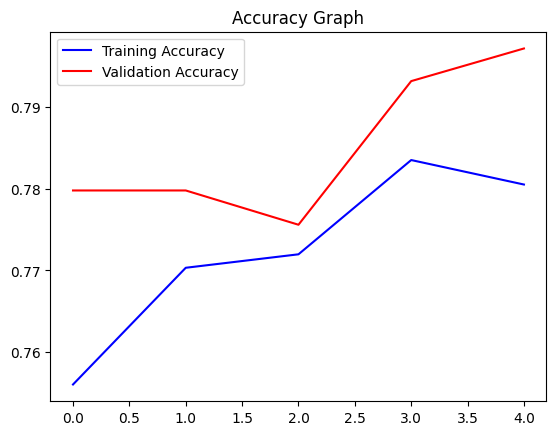

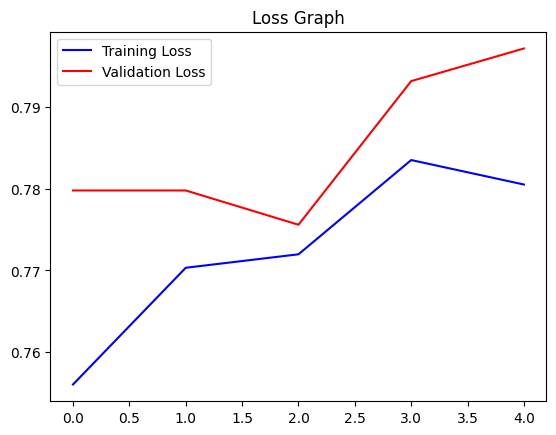

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label="Training Accuracy")
plt.plot(epochs,val_acc,'r',label="Validation Accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,acc,'b',label="Training Loss")
plt.plot(epochs,val_acc,'r',label="Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.show()


[[0.10195501]
 [0.66816247]
 [0.9613272 ]
 ...
 [0.920103  ]
 [0.33942163]
 [0.9446979 ]]
